In [1]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

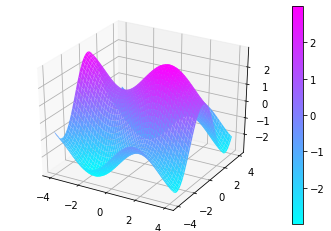

In [15]:
#Grafica 3d de la funcion de coste

fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

def f(x,y):
  return np.sin(x) + 2*np.cos(y)

res = 100
x = np.linspace(-4,4,res)
y = np.linspace(-4,4,res)

X,Y = np.meshgrid(x,y)

Z = f(X,Y)

surf = ax.plot_surface(X,Y,Z,cmap=cm.cool)

fig.colorbar(surf)


[-1.57581881  3.13659265]


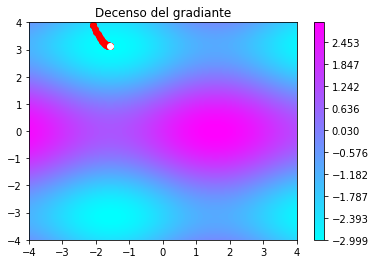

In [17]:
level_map = np.linspace(np.min(Z),np.max(Z),res)
plt.contourf(X,Y,Z,levels = level_map, cmap=cm.cool)
plt.colorbar()
plt.title("Decenso del gradiante")


p = np.random.rand(2) *8 - 4
plt.plot(p[0],p[1],"o",c="k")

h = 0.01
lr = 0.01

def derivate(cp,p):
    return (f(cp[0], cp[1]) - f(p[0], p[1])) / h 

def gradient(p):
  grad = np.zeros(2)

  for idx, val in enumerate(p):
    cp = np.copy(p)
    cp[idx] = cp[idx] + h
    
    dp = derivate(cp, p)
    grad[idx] = dp 

  return grad 


for i in range(1000):
  p = p - lr*gradient(p)
  if(i % 10 == 0):
    plt.plot(p[0],p[1],"o",c="r")
    
plt.plot(p[0],p[1],"o",c="w")
print(p)